<a href="https://colab.research.google.com/github/farheenfathimaa/TensorFlow-DeepLearning/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

See full course materials on GitHub: [Notes](https://github.com/mrdbourke/tensorflow-deep-learning/)

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

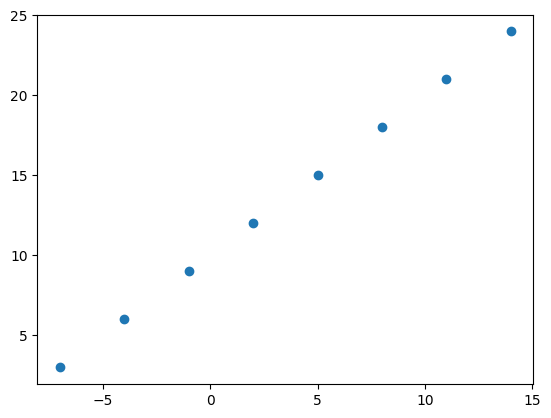

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).
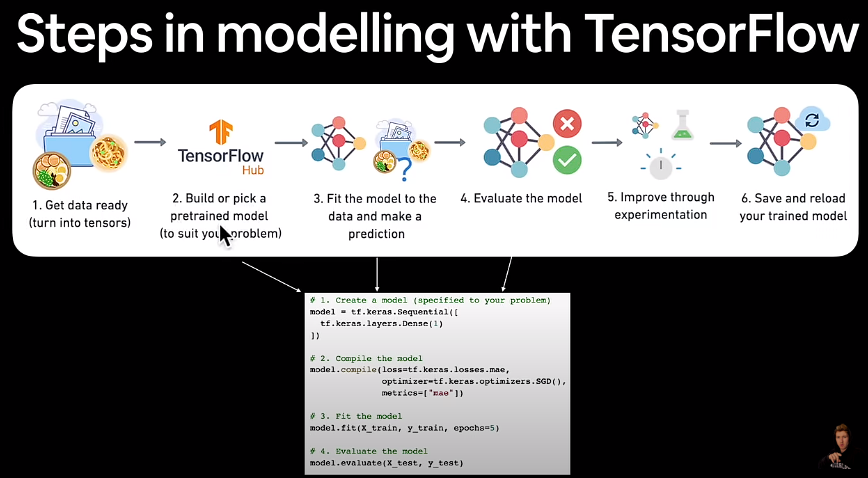

In [11]:
# optional
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [12]:
# Reshape X to have a batch dimension
X = tf.expand_dims(X, axis=-1)

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiler the model
model.compile(loss=tf.keras.losses.mae, # mae is mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 12.1959 - mae: 12.1959
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 12.0634 - mae: 12.0634
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.9309 - mae: 11.9309
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.7984 - mae: 11.7984
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 11.6659 - mae: 11.6659


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 142ms/step


array([[9.359208]], dtype=float32)

In [15]:
y_pred + 11

array([[20.359207]], dtype=float32)

## Improving our model
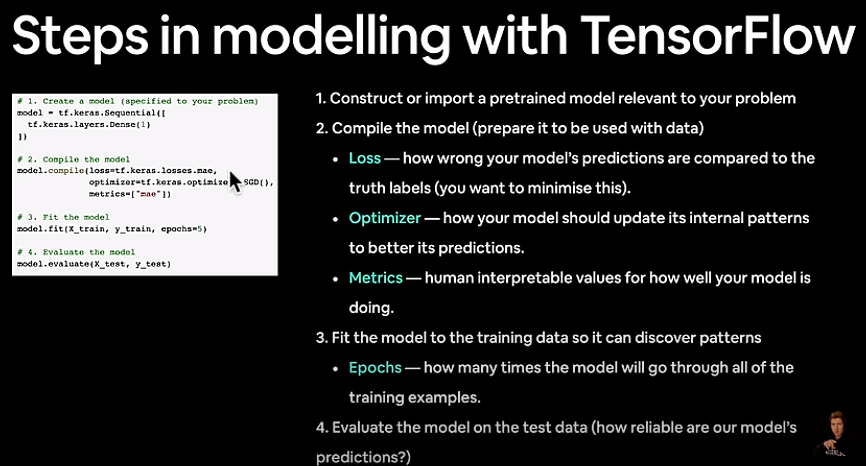

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).
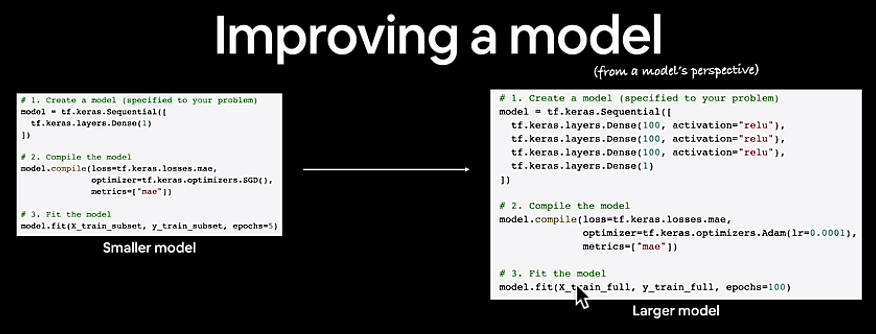

In [16]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 606ms/step - loss: 18.7612 - mae: 18.7612
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 18.4800 - mae: 18.4800
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 18.1987 - mae: 18.1987
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 17.9175 - mae: 17.9175
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 17.6362 - mae: 17.6362
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 17.3550 - mae: 17.3550
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 17.0737 - mae: 17.0737
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 16.7925 - mae: 16.7925
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 16.5112 - mae: 16.5112
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 16.2300 - mae: 16.2300
Epoch 11/100
1/1 [==============================

In [17]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 157ms/step


array([[29.630144]], dtype=float32)

In [19]:
# rebuilding the model (this time changing the optimizer(exercise))
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 18.0310 - mae: 18.0310
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 18.0250 - mae: 18.0250
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 18.0190 - mae: 18.0190
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 18.0130 - mae: 18.0130
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 18.0070 - mae: 18.0070
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 18.0010 - mae: 18.0010
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 17.9950 - mae: 17.9950
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 17.9890 - mae: 17.9890
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 17.9830 - mae: 17.9830
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 17.9770 - mae: 17.9770
Epoch 11/100
1/1 [==============================] -

In [20]:
# check if the model improved
model.predict([17.0])

1/1 [==============================] - 0s 121ms/step


array([[-15.300424]], dtype=float32)

In [21]:
# Let's see if we can make another to improve our model (video)

# 1. create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5189 - mae: 13.5189
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.4525 - mae: 13.4525
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3861 - mae: 13.3861
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3196 - mae: 13.3196
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2530 - mae: 13.2530
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1863 - mae: 13.1863
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 13.1196 - mae: 13.1196
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0528 - mae: 13.0528
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9859 - mae: 12.9859
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 12.9189 - mae: 12.9189
Epoch 11/100
1/1 [==============================] - 

In [22]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 84ms/step


array([[31.551947]], dtype=float32)

**Note:** Learning rate is the most important hyperparameter of many neural networks

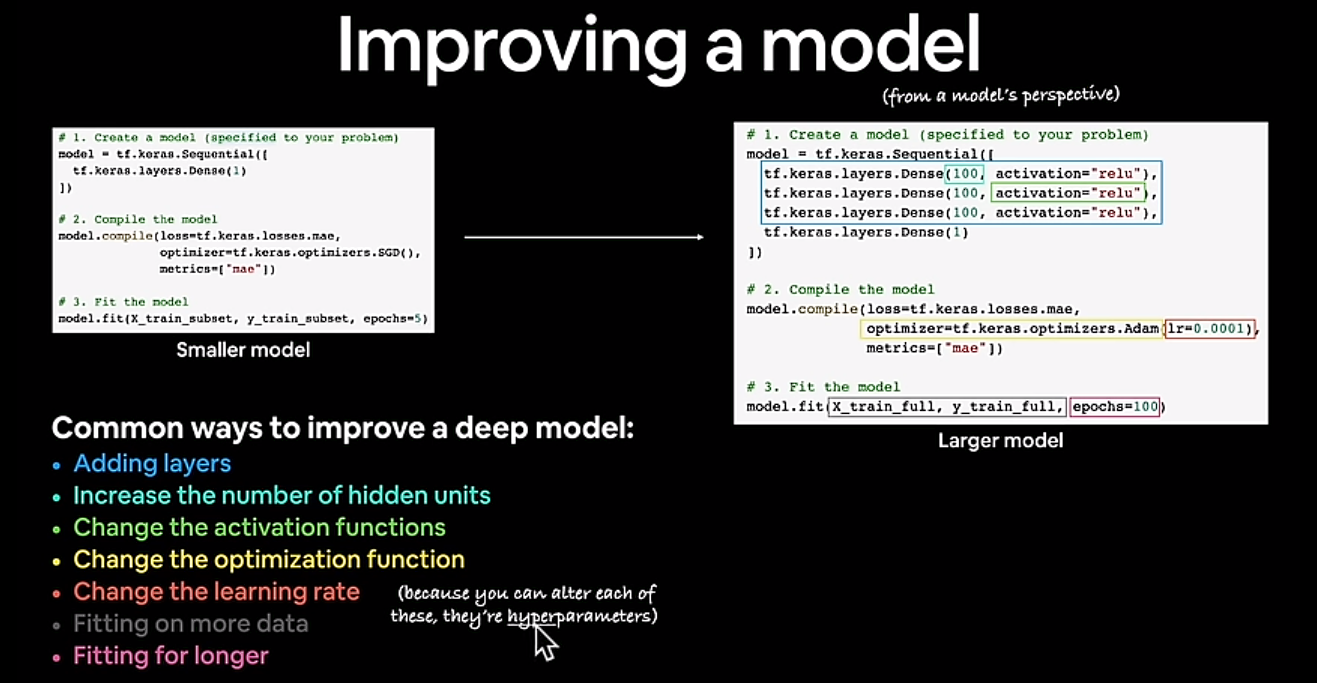

## Evaluting a model
In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
# Reshape X to have a batch dimension
X = tf.expand_dims(X, axis=-1)
X

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-90],
       [-86],
       [-82],
       [-78],
       [-74],
       [-70],
       [-66],
       [-62],
       [-58],
       [-54],
       [-50],
       [-46],
       [-42],
       [-38],
       [-34],
       [-30],
       [-26],
       [-22],
       [-18],
       [-14],
       [-10],
       [ -6],
       [ -2],
       [  2],
       [  6],
       [ 10],
       [ 14],
       [ 18],
       [ 22],
       [ 26],
       [ 30],
       [ 34],
       [ 38],
       [ 42],
       [ 46],
       [ 50],
       [ 54],
       [ 58],
       [ 62],
       [ 66],
       [ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

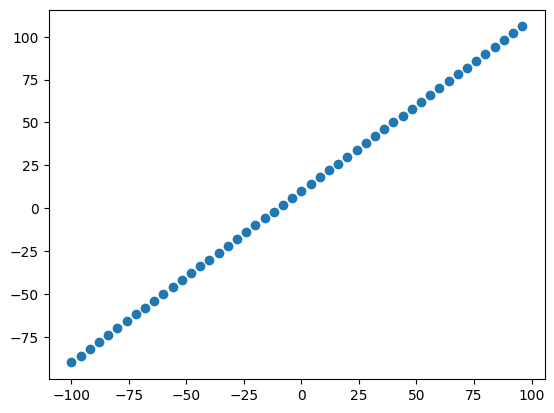

In [26]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y);

### The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

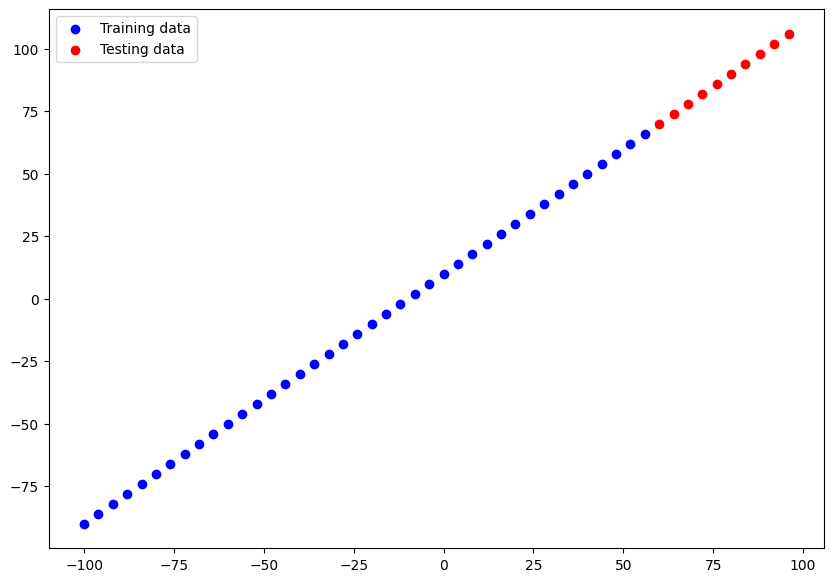

In [29]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in Red
plt.scatter(X_test, y_test, c="r", label="Testing data")
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [31]:
#model.summary()

In [32]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**📖 Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

**🛠 Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [34]:
# # Let's create a model
# tf.random.set_seed(42)

# # Create the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(5, input_shape=[1])
# ])

# # 2. Compile the model
# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics="mae")

# # summary of the model
# model.summary()

In [35]:
# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose = 0)

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


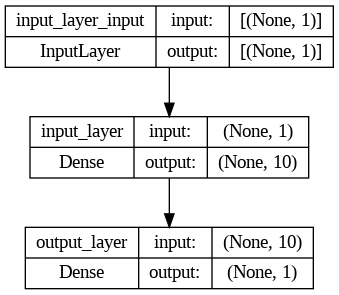

In [37]:
# plot_model is used to convert a keras model to dot format and save to a file
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [38]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred = tf.constant(y_pred)
y_pred

1/1 [==============================] - 0s 42ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.36676 ],
       [ 83.472305],
       [ 88.57784 ],
       [ 93.68338 ],
       [ 98.788925],
       [103.894455],
       [109.      ],
       [114.10553 ],
       [119.21107 ],
       [124.31661 ]], dtype=float32)>

In [39]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legend
  plt.legend();

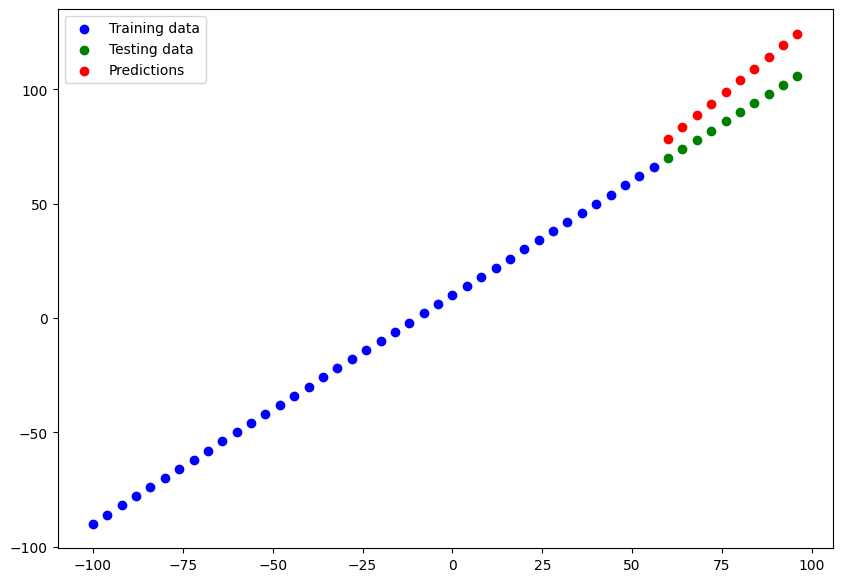

In [41]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

###Evaluting our model's predictions with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

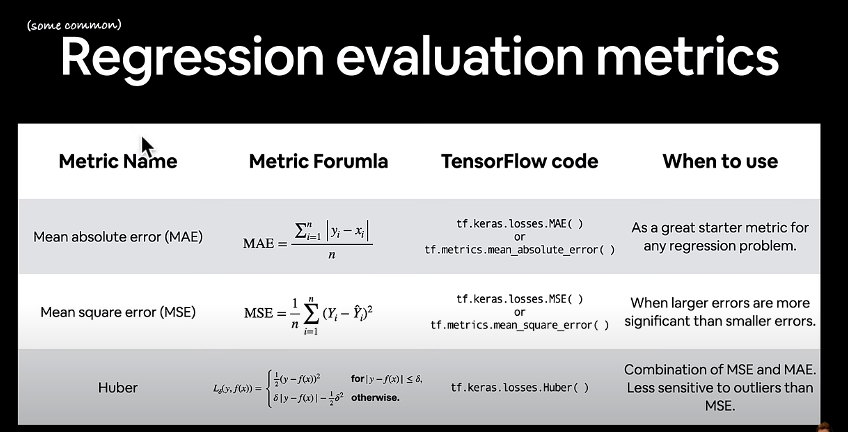

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 115ms/step - loss: 13.3417 - mae: 13.3417


[13.341687202453613, 13.341687202453613]

In [43]:
# Calculate the mean absolute error
# option 1: tf.metrics.mean_absolute_error(y_test, y_pred)
mae = tf.keras.losses.mae(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 8.36676 ,  9.472305, 10.577843, 11.68338 , 12.788925, 13.894455,
       15.      , 16.10553 , 17.211067, 18.316612], dtype=float32)>

In [44]:
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.36676 ],
       [ 83.472305],
       [ 88.57784 ],
       [ 93.68338 ],
       [ 98.788925],
       [103.894455],
       [109.      ],
       [114.10553 ],
       [119.21107 ],
       [124.31661 ]], dtype=float32)>

In [45]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)>

In [46]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.36676 ,  83.472305,  88.57784 ,  93.68338 ,  98.788925,
       103.894455, 109.      , 114.10553 , 119.21107 , 124.31661 ],
      dtype=float32)>

In [47]:
# calcuting again for testing
mae = tf.metrics.mean_absolute_error(y_true = tf.squeeze(y_test),
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.341687>

In [48]:
# Calculate mean square error
mse = tf.metrics.mean_squared_error(y_true = tf.squeeze(y_test),
                                   y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=188.08391>

In [49]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  """
  Calculates the MAE value
  """
  mae = tf.metrics.mean_absolute_error(y_true = tf.squeeze(y_true),
                                       y_pred = tf.squeeze(y_pred))
  return mae

def mse(y_true, y_pred):
  """
  Calculates the MSE value
  """
  mse = tf.metrics.mean_squared_error(y_true = tf.squeeze(y_true),
                                       y_pred = tf.squeeze(y_pred))
  return mse

### Running experiments to improve our model
```Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...```
1. **Get more data -** get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. **Make your model larger (using a more complex model) -** this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer -** give your model more of a chance to find patterns in the data.

**Let's do 3 modelling experiments:**

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
**Build `model_1`**

In [50]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

# fit a model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 38.8391 - mae: 38.8391
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9157 - mae: 10.9157
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6347 - mae: 11.6347
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3767 - mae: 9.3767
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2557 - mae: 10.2557
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5089 - mae: 9.5089
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6372 - mae: 8.6372
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0573 - mae: 9.0573
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.9042 - mae: 18.9042
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.2047 - mae: 10.2047
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

1/1 [==============================] - 0s 53ms/step


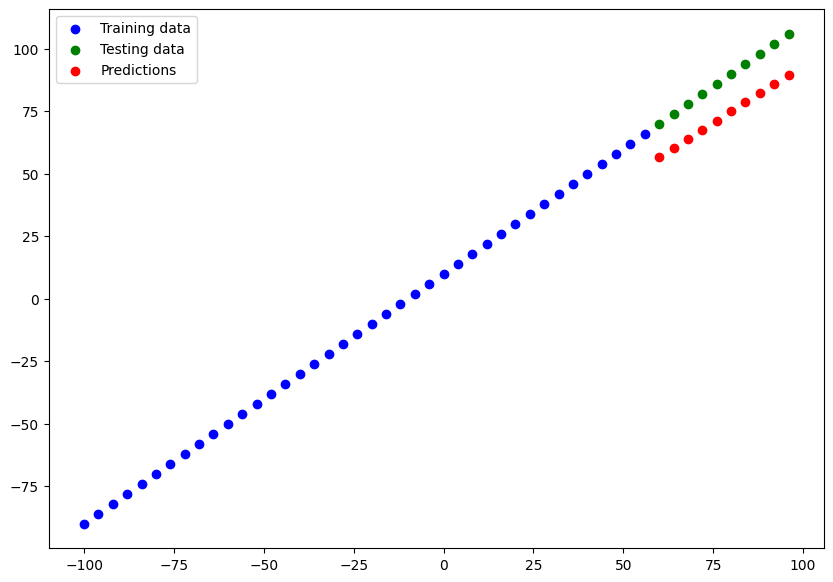

In [51]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.870069>,
 <tf.Tensor: shape=(), dtype=float32, numpy=221.94272>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [59]:
# Set the seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 26.4731 - mae: 26.4731
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9447 - mae: 15.9447
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 32.4634 - mae: 32.4634
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 17.1240 - mae: 17.1240
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 22.9531 - mae: 22.9531
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4635 - mae: 11.4635
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5648 - mae: 12.5648
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0964 - mae: 11.0964
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 39.9322 - mae: 39.9322
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.3959 - mae: 27.3959
Epoch 11/100
2/2 [==============================] - 0s 6ms

1/1 [==============================] - 0s 45ms/step


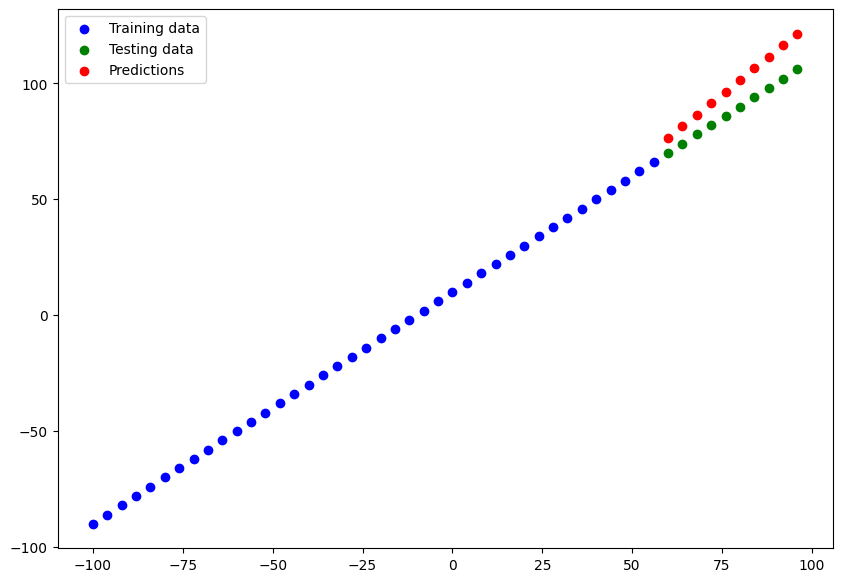

In [60]:
# Make and plot the predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [61]:
# Evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.943219>,
 <tf.Tensor: shape=(), dtype=float32, numpy=127.76233>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics="mae")

# fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 30ms/step - loss: 35.1891 - mae: 35.1891
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 25.7668 - mae: 25.7668
Epoch 3/500
2/2 [==============================] - 0s 23ms/step - loss: 31.8043 - mae: 31.8043
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 23.6367 - mae: 23.6367
Epoch 5/500
2/2 [==============================] - 0s 18ms/step - loss: 14.0935 - mae: 14.0935
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 11.2793 - mae: 11.2793
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 12.2924 - mae: 12.2924
Epoch 8/500
2/2 [==============================] - 0s 14ms/step - loss: 10.9240 - mae: 10.9240
Epoch 9/500
2/2 [==============================] - 0s 26ms/step - loss: 38.3120 - mae: 38.3120
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 25.8493 - mae: 25.8493
Epoch 11/500
2/2 [==============================]

1/1 [==============================] - 0s 147ms/step


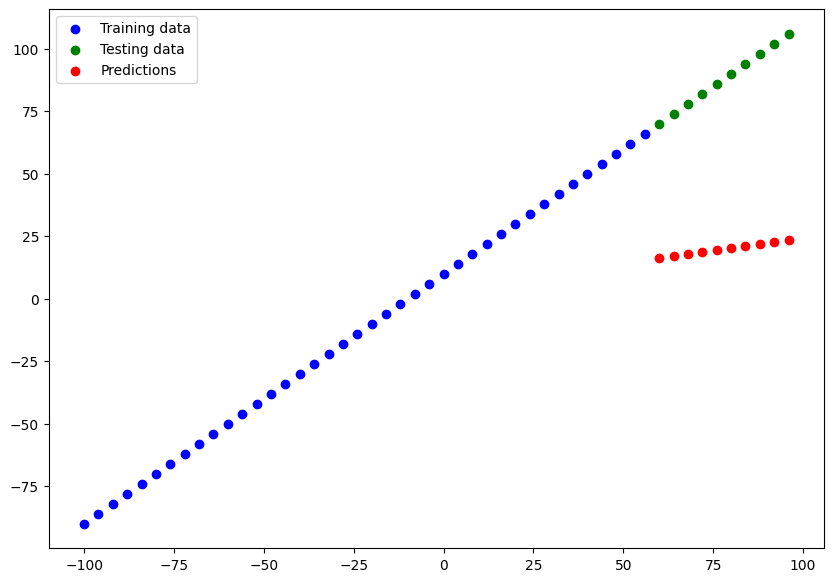

In [57]:
# make and plot the predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [58]:
# Calculate model_3 evaluation
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.01167>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4710.243>)

**🔑 Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

##Comparing the results of our experiments
We've run a few experiments, let's compare the results.

In [63]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.870069,221.942719
1,model_2,10.943219,127.762329
2,model_3,68.011673,4710.243164


Looks like `model_2` performed the best...

In [64]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 Note: One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: *"experiment, experiment, experiment"*.

## Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**📖 Resource:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* [Weights & Biases](https://wandb.ai/site/) - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [66]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [67]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
